In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
import os
os.chdir("/content/gdrive/My Drive/dlp19/proje")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
from random import sample
import pickle, cv2
#from scipy.misc import imresize
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import keras
from keras import applications, optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
import h5py
from keras.utils import plot_model



Using TensorFlow backend.


In [0]:
seed = 1337
np.random.seed(seed)

epochs = 5
batch_size = 25
input_shape = (224, 224, 3)
 
data = np.load('/content/gdrive/My Drive/dlp19/proje/images_labels_224.npz')
x = data['x']
y = data['y']
n_classes = len(np.unique(y))    


FileNotFoundError: ignored

In [0]:
def train_validation_split(x, y):
    # split data into training and test sets
    X_training, X_test, y_training, y_test = train_test_split(x, y, stratify=y, test_size= 0.1, random_state=1337)

    # split training into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, stratify=y_training, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test



In [0]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_split(x, y)
print('Train data shape: ', X_train.shape) # 90% - 4752 (3564 + 1188)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape) # 10% - 528
print('Test labels shape: ', y_test.shape)

Train data shape:  (3564, 224, 224, 3)
Train labels shape:  (3564,)
Validation data shape:  (1188, 224, 224, 3)
Validation labels shape:  (1188,)
Test data shape:  (528, 224, 224, 3)
Test labels shape:  (528,)


In [0]:
def one_hot(y_train, y_val, y_test, n_classes):
    y_train = np_utils.to_categorical(y_train, n_classes)
    y_val = np_utils.to_categorical(y_val, n_classes)
    y_test = np_utils.to_categorical(y_test, n_classes)
    return y_train, y_val, y_test


In [0]:
y_train, y_val, y_test = one_hot(y_train, y_val, y_test, n_classes)

print(y_train)
print(y_val)
print(y_test)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [0]:
base_model = applications.VGG19(include_top=False, weights='imagenet', input_tensor=layers.Input(), input_shape=input_shape)



x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.25)(x)
predictions = Dense(n_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)


model.summary()

NameError: ignored

In [0]:
# save the best model only
filepath ='/content/gdrive/My Drive/dlp19/proje/model_vgg19.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, 
                                             monitor='val_acc', 
                                             verbose=1, 
                                             save_best_only=True, 
                                             mode='max')
callbacks_list = [checkpoint]


In [0]:
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(loss=keras.losses.categorical_crossentropy,
              #optimizer=SGD(lr=0.1, momentum=0, decay=0, nesterov=False),
              #metrics=['accuracy'])

NameError: ignored

In [0]:
batch_size = 65
epochs = 10
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=callbacks_list,
                    verbose=1,
                    validation_data=(X_val, y_val))
    
    

W0707 19:35:00.086578 139860723660672 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3564 samples, validate on 1188 samples
Epoch 1/10
3564/3564 [==============================] - 75s 21ms/step - loss: 1.6955 - acc: 0.4439 - val_loss: 1.2225 - val_acc: 0.5867

Epoch 00001: val_acc improved from -inf to 0.58670, saving model to /content/gdrive/My Drive/dlp19/proje/model_Resnet50.hdf5
Epoch 2/10
3564/3564 [==============================] - 49s 14ms/step - loss: 0.4790 - acc: 0.8608 - val_loss: 1.1346 - val_acc: 0.6288

Epoch 00002: val_acc improved from 0.58670 to 0.62879, saving model to /content/gdrive/My Drive/dlp19/proje/model_Resnet50.hdf5
Epoch 3/10
3564/3564 [==============================] - 49s 14ms/step - loss: 0.1489 - acc: 0.9778 - val_loss: 1.1198 - val_acc: 0.6431

Epoch 00003: val_acc improved from 0.62879 to 0.64310, saving model to /content/gdrive/My Drive/dlp19/proje/model_Resnet50.hdf5
Epoch 4/10
3564/3564 [==============================] - 49s 14ms/step - loss: 0.0501 - acc: 0.9969 - val_loss: 1.1677 - val_acc: 0.6574

Epoch 00004: val_acc im

In [0]:
history.history["acc"]


[0.44388328905647995,
 0.8608305354913076,
 0.9778338961227976,
 0.9969135805813953,
 0.9997194164028071,
 0.9997194164028071,
 0.9994388328056143,
 0.9997194164028071,
 0.9988776656112286,
 1.0]

In [0]:
model.load_weights(filepath)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2944577932357788
Test accuracy: 0.6268939393939394


In [0]:
plot_model(model, to_file='model.png')

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

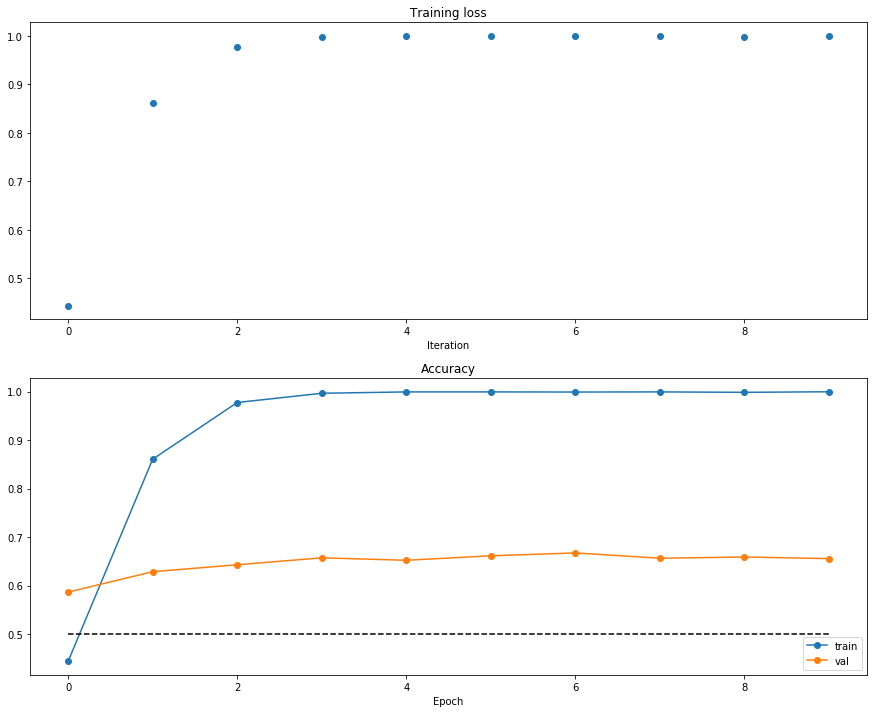

In [0]:
plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(history.history["acc"], 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(history.history["acc"], '-o', label='train')
plt.plot(history.history["val_acc"], '-o', label='val')
plt.plot([0.5] * len(history.history["val_acc"]), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()